In [34]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [35]:
df=pd.read_csv("Bankloan_Cleanedv1.csv")

In [36]:
df

,age,employ,address,income,debtinc,creddebt,othdebt,ed,default
0,41.0,17,12,176.0,9.3,11.359392,5.008608,3.0,1
1,27.0,10,6,31.0,17.3,1.362202,4.000798,1.0,0
2,40.0,15,7,NaN,5.5,0.856075,2.168925,1.0,0
3,41.0,15,14,120.0,2.9,2.658720,0.821280,NaN,0
4,24.0,2,0,28.0,17.3,1.787436,3.056564,2.0,1
...,...,...,...,...,...,...,...,...,...
695,36.0,6,15,27.0,4.6,0.262062,0.979938,2.0,1
696,29.0,6,4,21.0,11.5,0.369495,2.045505,2.0,0
697,33.0,15,3,32.0,7.6,0.491264,1.940736,1.0,0
698,45.0,19,22,77.0,8.4,2.302608,4.165392,1.0,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       680 non-null    float64
 1   employ    700 non-null    int64  
 2   address   700 non-null    int64  
 3   income    663 non-null    float64
 4   debtinc   700 non-null    float64
 5   creddebt  700 non-null    float64
 6   othdebt   700 non-null    float64
 7   ed        680 non-null    float64
 8   default   700 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 49.3 KB


In [38]:
df['age']=df['age'].fillna(df['age'].mean())

<Axes: xlabel='age', ylabel='Count'>

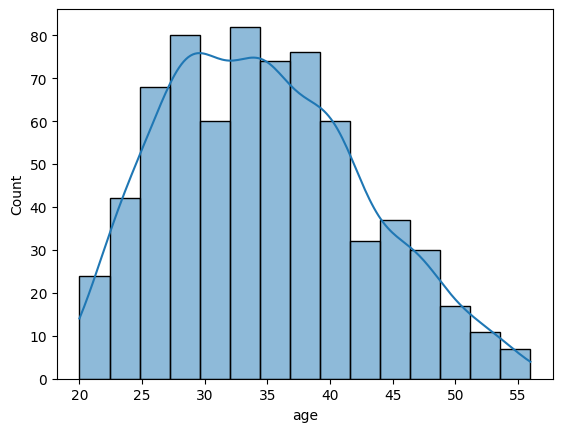

In [39]:
sns.histplot(df['age'], kde=True)

In [40]:
df.describe()

,age,employ,address,income,debtinc,creddebt,othdebt,ed,default
count,700.000000,700.000000,700.000000,663.00000,700.000000,700.000000,700.000000,680.000000,700.000000
mean,34.750000,8.388571,8.268571,45.74359,10.260571,1.553553,3.058209,1.717647,0.261429
std,7.858322,6.658039,6.821609,37.44108,6.827234,2.117197,3.287555,0.925652,0.439727
min,20.000000,0.000000,0.000000,14.00000,0.400000,0.011696,0.045584,1.000000,0.000000
25%,29.000000,3.000000,3.000000,24.00000,5.000000,0.369059,1.044178,1.000000,0.000000
50%,34.000000,7.000000,7.000000,34.00000,8.600000,0.854869,1.987567,1.000000,0.000000
75%,40.000000,12.000000,12.000000,54.50000,14.125000,1.901955,3.923065,2.000000,1.000000
max,56.000000,31.000000,34.000000,446.00000,41.300000,20.561310,27.033600,5.000000,1.000000


In [41]:
df['income']=df['income'].fillna(df['income'].median())
df['ed']=df['ed'].fillna(df['ed'].median())

In [42]:
df.describe()

,age,employ,address,income,debtinc,creddebt,othdebt,ed,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.750000,8.388571,8.268571,45.122857,10.260571,1.553553,3.058209,1.697143,0.261429
std,7.858322,6.658039,6.821609,36.531434,6.827234,2.117197,3.287555,0.920125,0.439727
min,20.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,1.000000,0.000000
25%,29.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,1.000000,0.000000
50%,34.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,1.000000,0.000000
75%,40.000000,12.000000,12.000000,52.250000,14.125000,1.901955,3.923065,2.000000,1.000000
max,56.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,5.000000,1.000000


In [47]:
Q1,Q3=df.income.quantile([0.001,0.999])

new_df=df[(df.income>Q1)&(df.income<Q3)]

<Axes: xlabel='income', ylabel='Count'>

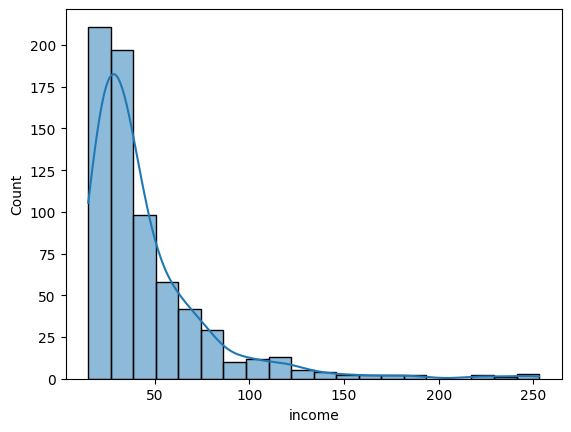

In [48]:
sns.histplot(new_df['income'], kde=True, bins =20)

<Axes: xlabel='income', ylabel='Count'>

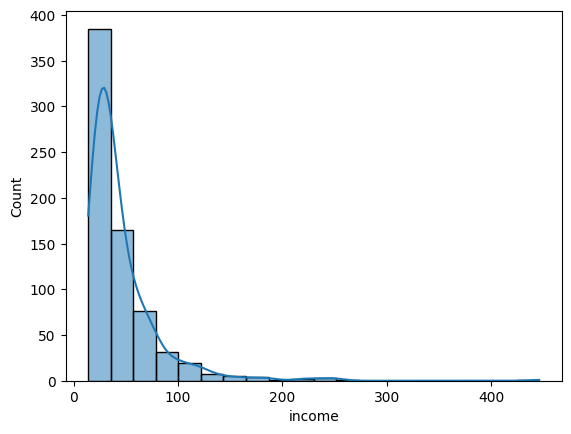

In [49]:
sns.histplot(df['income'], kde=True, bins =20)

In [57]:
#lower_limit= df.income.mean() - 3*df.income.std()
#upper_limit=df.income.mean() + 3*df.income.std()
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
newer_df = new_df[(new_df['income'] >= lower_bound) & (new_df['income'] <= upper_bound)]


<Axes: xlabel='income', ylabel='Count'>

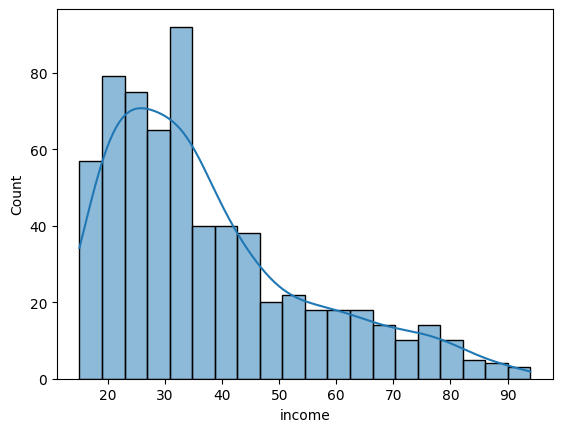

In [58]:
#newer_df=df[(df.income>lower_limit)&(df.income<upper_limit)]
sns.histplot(newer_df['income'], kde=True, bins =20)

In [59]:
newer_df

,age,employ,address,income,debtinc,creddebt,othdebt,ed,default
1,27.0,10,6,31.0,17.3,1.362202,4.000798,1.0,0
2,40.0,15,7,34.0,5.5,0.856075,2.168925,1.0,0
4,24.0,2,0,28.0,17.3,1.787436,3.056564,2.0,1
5,41.0,5,5,25.0,10.2,0.392700,2.157300,2.0,0
6,39.0,20,9,34.0,30.6,3.833874,16.668126,1.0,0
...,...,...,...,...,...,...,...,...,...
695,36.0,6,15,27.0,4.6,0.262062,0.979938,2.0,1
696,29.0,6,4,21.0,11.5,0.369495,2.045505,2.0,0
697,33.0,15,3,32.0,7.6,0.491264,1.940736,1.0,0
698,45.0,19,22,77.0,8.4,2.302608,4.165392,1.0,0


In [60]:
newer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 642 entries, 1 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       642 non-null    float64
 1   employ    642 non-null    int64  
 2   address   642 non-null    int64  
 3   income    642 non-null    float64
 4   debtinc   642 non-null    float64
 5   creddebt  642 non-null    float64
 6   othdebt   642 non-null    float64
 7   ed        642 non-null    float64
 8   default   642 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 50.2 KB
